In [1]:
%%HTML
<style>
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}
</style>

# Metody Numeryczne

## Rozkład Choleskiego



### dr hab. inż. Jerzy Baranowski, Prof.AGH


## Macierz symetryczna

Rzeczywista macierz $A\in R^{m\times m}$ jest symetryczna jeżeli ma te same elementy nad i pod diagonalą tj. $a_{ij}=a_{ji}$ więc $A=A^\mathsf{T}$.

Dla takiej macierzy zachodzi:
$$
x^\mathsf{T}Ay=y^\mathsf{T}Ax,\ \forall x,y\in R^m
$$





## Macierz hermitowska
Zespolona macierz $A\in C^{m\times m}$ jest hermitowska, jeżeli elementy pod diagonalą są sprzężone do tych nad diagonalą tj. $a_{ij}=\bar{a}_{ji}$ więc $A=A^*$. 

Elementy na przekątnej macierzy hermitowskiej muszą być rzeczywiste

Dla takiej macierzy zachodzi:
$$
x^*Ay=\left(y^*Ax\right)^*,\ \forall x,y\in C^m
$$
oraz dla każdego $x\in C^m$ iloczyn $x^*Ax$ jest rzeczywisty




## Macierz dodatnio określona

Jeżeli dla hermitowskiej (symetrycznej) macierzy $A$ i każdego $x\in C^m$ takiego, że $x\neq0$ zachodzi
$$
x^*Ax>0
$$
to mówimy, że macierz $A$ jest **dodatniono określona**.

## Terminologia
Są nieścisłości w terminologii (i to nie tylko po polsku)

|                             | Wariant 1                  | Wariant 2                     |
|-----------------------------|----------------------------|-------------------------------|
| $x^*Ax>0$, $\forall x\neq0$ | $A$ dodatnio określona     | $A$ ściśle dodatnio określona |
| $x^*Ax\geq0$, $\forall x$   | $A$ pół-dodatnio określona | $A$dodatnio określona         |

Po angielsku występują nazwy *semi-positive definite*, *positive definite* i *strictly positive definite*.


## Własności
- Wartości własne macierzy hermitowskiej są zawsze rzeczywiste
- Wartości własne macierzy dodatnio określonej są zawsze dodatnie (i odwrotnie)
- Wartości singularne macierzy symetrycznej są (z dokładnością do znaku) jej wartościami własnymi.
- Minory wiodące macierzy dodatnio określonej są dodatnie

## Zastosowania

Macierze dodatnio określone często występują w zastosowaniach:
 - statystyka (macierze kowariancji i korelacji)
 - mechanika i elektrotechnika (energia)
 - optymalizacji (macierz drugich pochodnych minimalizowanej funkcji)
 - badaniu stabilności (funkcjonały Lapunowa)

## Symetryczna eliminacja Gaussa ($a_{11}=1$)
Zacznijmy od lewej 
$$
A=\begin{bmatrix}
1&w^*\\w&K
\end{bmatrix}
=
\begin{bmatrix}
1&0\\w&I
\end{bmatrix}
\begin{bmatrix}
1&w^*\\0&K-ww^*
\end{bmatrix}
$$
Analogicznie z drugiej strony
$$
\begin{bmatrix}
1&w^*\\0&K-ww^*
\end{bmatrix}=
\begin{bmatrix}
1&0\\0&K-ww^*
\end{bmatrix}
\begin{bmatrix}
1&w*\\0&I
\end{bmatrix}
$$
Czyli
$$
A=\begin{bmatrix}
1&w^*\\w&K
\end{bmatrix}
=
\begin{bmatrix}
1&0\\w&I
\end{bmatrix}
\begin{bmatrix}
1&0\\0&K-ww^*
\end{bmatrix}
\begin{bmatrix}
1&w*\\0&I
\end{bmatrix}
$$



## Rozkład Choleskiego
Niech $a_{11}>0$ i $\alpha=\sqrt{a_{11}}$ 
$$
\begin{aligned}
A={}&\begin{bmatrix}
a_{11}&w^*\\w&K
\end{bmatrix}\\
={}&\begin{bmatrix}
\alpha&0\\w/\alpha&I
\end{bmatrix}\begin{bmatrix}
1&0\\0&K-ww^{*}/a_{11}
\end{bmatrix}\begin{bmatrix}
\alpha&w^*/\alpha\\0&I
\end{bmatrix}=R^*_1 A_1 R_1
\end{aligned}
$$
Konsekwentnie
$$
A=\underbrace{R^*_1R^*_2\dots R^*_m}_{R^*}\underbrace{R_1R_2\dots R_m}_{R}
$$
czyli
$$
A=R^*R,\ r_{jj}>0
$$


## Dlaczego to działa?

Wszystko zadziała, jeżeli lewy górny element macierzy $K-ww^*/a_{11}$ będzie dodatni. On jest dodatni, ponieważ macierz $K-ww^*/a_{11}$ jest dodatnio określona, jeżeli $A$ jest dodanio określona.

W konsekwencji zachodzi twierdzenie

*Każda macierz dodatnio określona ma jednoznacznie określony rozkład Choleskiego*

## Algorytm
$R=A$

$\mathbf{for}$ $k=1$ $\mathbf{to}$ $m$
{

$\mathbf{for}$ $j=k+1$ $\mathbf{to}$ $m$
{

$R_{j,j:m}=R_{j,j:m}-R_{j,j:m}R_{kj}/R_{k,k}$

}

$R_{k,k:m}=R_{k,k:m}/\sqrt{R_{k,k}}$

}     

Złożonośc obliczeniowa to $O\left(\frac{1}{3}m^3\right)$ czyli dwa razy szybciej niż eliminacja Gaussa

## Uwarunkowanie

Rozkład Choleskiego jest stabilny wstecznie. Wszystkie problemy występujące przy rozkładzie LU go nie dotyczą, ze względu na dodatnio-określoność.

## Przykład zastosowania - proces gaussowski

Procesy gaussowskie to zaawansowane nieparametryczne modele statystyczne.

Za ich pomocą można modelować w zasadzie dowolne funkcje, przy założeniu, że wartości w punktach podlegają pewnemu rozkładowi Gaussa. 

Kowariancja między poszczególnymi punktami jest określona za pomocą tzw. funkcji jądra
$ k(x,y) $ zaś macierz kowariancji to wartości tych funkcji w poszczególnych punktach

$$
K(X,X) = [k(x_i,x_j)]_{ij}
$$

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import scipy.sparse.linalg

def kernel_func(x,y):
    return np.exp(-0.5*15*np.abs(x-y)**2)
def cov_matrix(X,Y):
    K=np.zeros([len(X),len(Y)])
    for i,x in enumerate(X):
        for j,y in enumerate(Y):
            K[i,j]=kernel_func(x,y)
    return K;

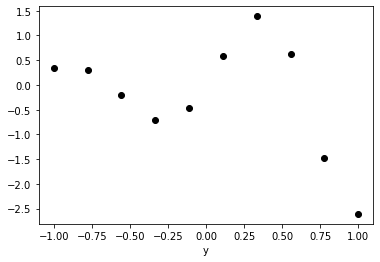

In [3]:
x=np.linspace(-1,1,10)
y=np.exp(x)*np.sin(5*x)

fig,ax = plt.subplots(1,1)
ax.plot(x,y,marker='o',linestyle='none',c='black')
ax.set_xlabel('x')
ax.set_xlabel('y')

plt.show()

## Przewidywanie wartości w punktach z użyciem procesu gaussowskiego
Mamy wartości $\mathbf{y}$ w zbiorze punktów $X$, pomiary mają szum $\sigma$ chcemy dokonać predykcji $\mathbf{f}$ w punktach $X_*$ wraz z oceną niepewności tej predykcji.

Określa nam to łączny wielowymiarowy rozkład normalny
$$
\begin{bmatrix}
\mathbf{y}\\ \mathbf{f}
\end{bmatrix}
\sim
\mathcal{N}
\left(
\mathbf{0},\begin{bmatrix}
K(X,X)+\sigma^2 I& K(X,X^*)\\K(X^*,X)&K(X^*,X^*)
\end{bmatrix}
\right)
$$
z którego możemy dostać rozkład warunkowy predykcji $$\mathbf{f}|X,\mathbf{y},X_*\sim\mathcal{N}(\bar{\mathbf{f}},\mathrm{cov}(\mathbf{f}))$$
gdzie
$$
\begin{aligned}
\bar{\mathbf{f}}={}&K(X^*,X)[K(X,X)+\sigma^2]^{-1}\mathbf{y}\\
\mathrm{cov}(\mathbf{f})={}&K(X^*,X^*)-K(X_*,X)[K(X,X)+\sigma^2I]^{-1}K(X,X_*)
\end{aligned}
$$


In [4]:
x_gw=np.linspace(-1,1,100)
sigma2=0.01
Kxx=cov_matrix(x,x)
Kxxgw=cov_matrix(x,x_gw)
L=np.linalg.cholesky(Kxx+sigma2*np.identity(len(x)))
alpha=scipy.linalg.solve_triangular(
    L.T,scipy.linalg.solve_triangular(L,y,lower=True))
f=np.zeros(len(x_gw))
Vf=np.zeros(len(x_gw))
for i in range(len(x_gw)):
    k_gw=Kxxgw[:,i]
    v=scipy.linalg.solve_triangular(L,k_gw,lower=True)
    f[i]=k_gw.T@alpha
    Vf[i]=1-v.T@v


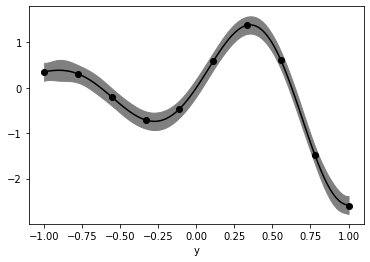

In [5]:
fig,ax = plt.subplots(1,1)
ax.plot(x,y,marker='o',linestyle='none',c='black')
ax.plot(x_gw,f,c='black')
ax.fill_between(x_gw,f-2*np.sqrt(np.abs(Vf)),f+2*np.sqrt(np.abs(Vf)),color='gray')
ax.set_xlabel('x')
ax.set_xlabel('y')

plt.show()